In [18]:
import pandas as pd
import numpy as np



file_path = 'synthetic_health_data.csv'
hd = pd.read_csv(file_path)

hd.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


In [19]:
hd.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [20]:
null_values = hd.isnull().sum()
null_values

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

In [22]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

X = hd.drop(columns=['Health_Score'])
y = hd['Health_Score']

# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df

,MSE,RMSE,RSE,RSS,R^2
Regression Tree,85.007126,9.205069,9.330313,25502.137876,0.534360
Ridge Regression,31.661918,5.621652,5.698141,9498.575328,0.826780
Lasso Regression,37.592624,6.125323,6.208665,11277.787168,0.794529
Principal Component Regression (PCR),31.672058,5.622544,5.699045,9501.617469,0.826723
Regression Splines,22.428753,4.728991,4.793334,6728.625941,0.877057
Support Vector Regression (SVR),41.212876,6.403259,6.490382,12363.862828,0.775490


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 1}
Ridge Regression - Metrics: {'MSE': 37.90431559158389, 'RMSE': 6.1566480808621735, 'RSE': 6.240415850835048, 'RSS': 11371.294677475167, 'R²': 0.8141206290135152}



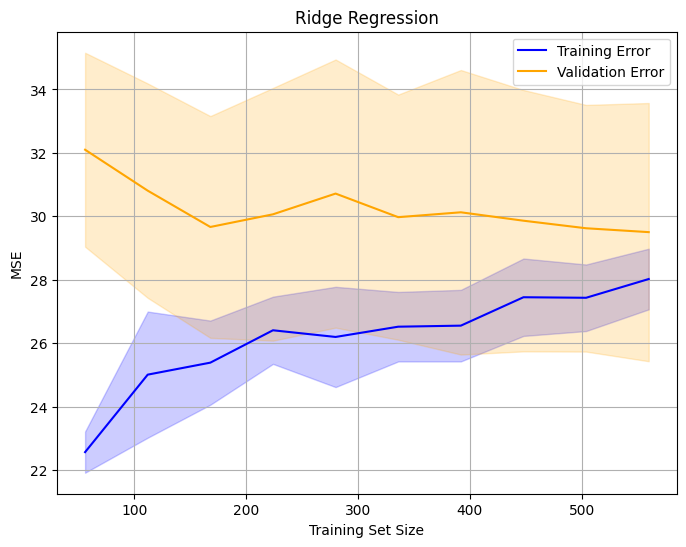

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 37.889454706555036, 'RMSE': 6.1554410651516305, 'RSE': 6.239192412387153, 'RSS': 11366.836411966511, 'R²': 0.8141935054635541}



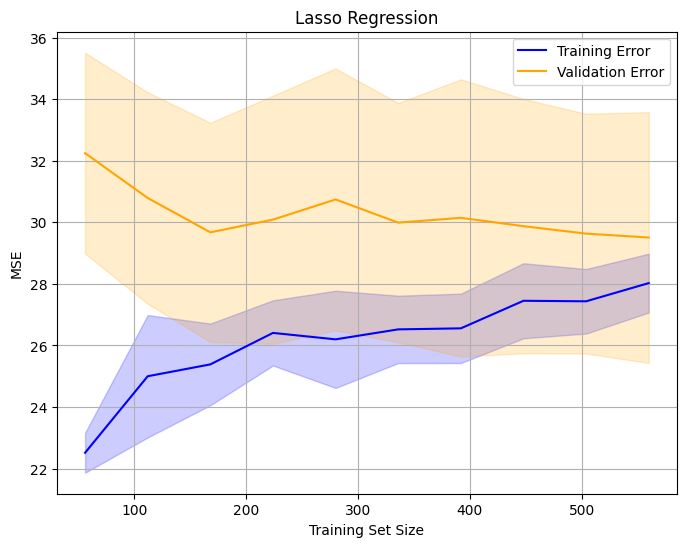

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 7}
Principal Component Regression (PCR) - Metrics: {'MSE': 37.92408829854236, 'RMSE': 6.158253672798999, 'RSE': 6.242043288564302, 'RSS': 11377.226489562707, 'R²': 0.8140236654283726}



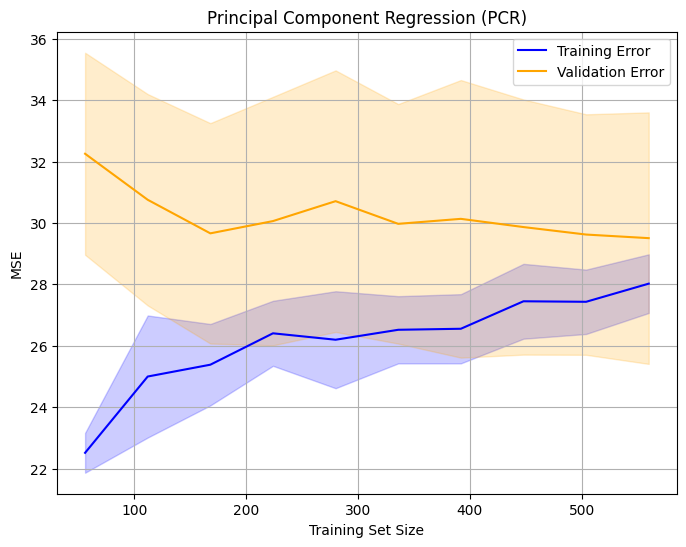

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 21.672731703891507, 'RMSE': 4.655398125175924, 'RSE': 4.718739786768391, 'RSS': 6501.819511167452, 'R²': 0.893718863569913}



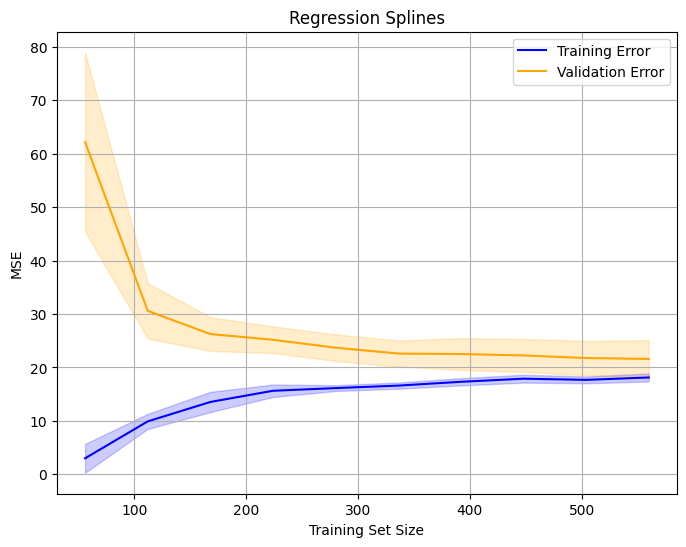

Running GridSearchCV for Regression Tree...
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
Regression Tree - Metrics: {'MSE': 87.89423856290593, 'RMSE': 9.375192721374102, 'RSE': 9.502752227296916, 'RSS': 26368.271568871776, 'R²': 0.5689745211746668}



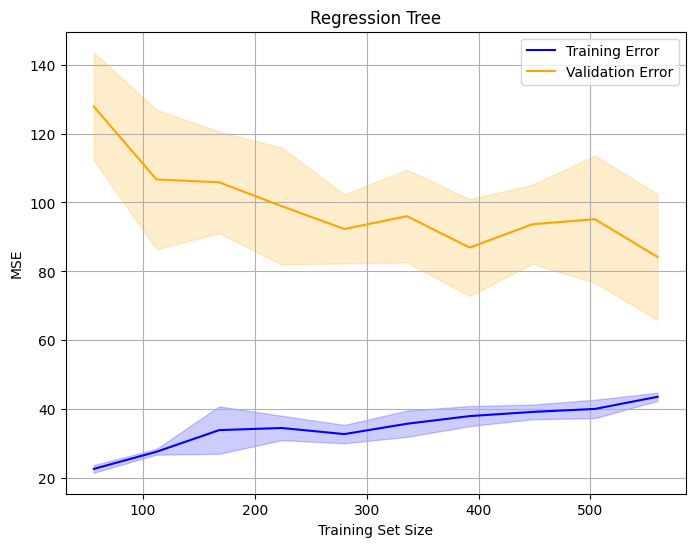

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
Support Vector Regression (SVR) - Metrics: {'MSE': 39.30295841949471, 'RMSE': 6.269207160358852, 'RSE': 6.354506416776265, 'RSS': 11790.887525848411, 'R²': 0.8072618097727704}



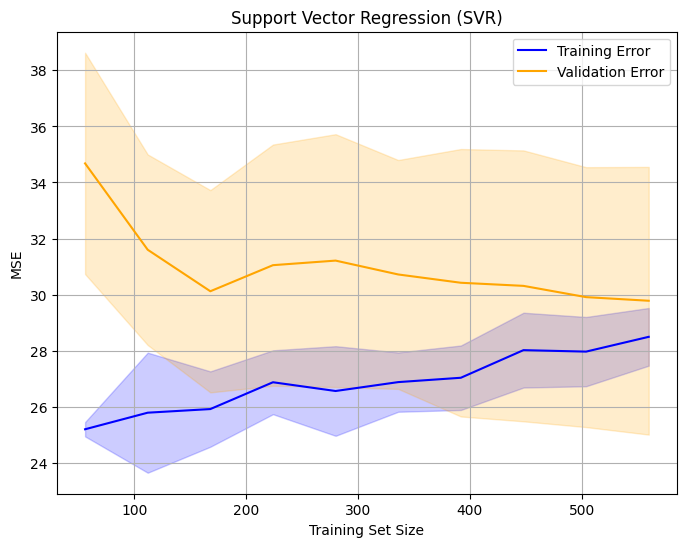


Model Performance Metrics:
                                            MSE      RMSE       RSE  \
Ridge Regression                      37.904316  6.156648  6.240416   
Lasso Regression                      37.889455  6.155441  6.239192   
Principal Component Regression (PCR)  37.924088  6.158254  6.242043   
Regression Splines                    21.672732  4.655398  4.718740   
Regression Tree                       87.894239  9.375193  9.502752   
Support Vector Regression (SVR)       39.302958  6.269207  6.354506   

                                               RSS        R²  
Ridge Regression                      11371.294677  0.814121  
Lasso Regression                      11366.836412  0.814194  
Principal Component Regression (PCR)  11377.226490  0.814024  
Regression Splines                     6501.819511  0.893719  
Regression Tree                       26368.271569  0.568975  
Support Vector Regression (SVR)       11790.887526  0.807262  

Best Parameters for Each Model:


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3]},
    'Regression Tree': {
        'decisiontreeregressor__max_depth': [3, 4, 5],
        'decisiontreeregressor__min_samples_split': [10, 15, 20],
        'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
    },
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1], 'svr__kernel': ['linear']}
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, title, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_scores = -train_scores  # Convert to positive MSE
    test_scores = -test_scores
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Error", color="blue")
    plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1), color="blue", alpha=0.2)
    plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Error", color="orange")
    plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                     test_scores.mean(axis=1) + test_scores.std(axis=1), color="orange", alpha=0.2)
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")



In [15]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,37.904316,6.156648,6.240416,11371.294677,0.814121
Lasso Regression,37.889455,6.155441,6.239192,11366.836412,0.814194
Principal Component Regression (PCR),37.924088,6.158254,6.242043,11377.226490,0.814024
Regression Splines,21.672732,4.655398,4.718740,6501.819511,0.893719
Regression Tree,87.894239,9.375193,9.502752,26368.271569,0.568975
Support Vector Regression (SVR),39.302958,6.269207,6.354506,11790.887526,0.807262
